In [43]:
from plotly import *

In [44]:
tools.set_credentials_file(username='akshat.b.shah14', api_key='gsaQxPLiePElXjdJV0BS')


In [45]:
import plotly.plotly as py
import pandas as pd
file1 = pd.read_csv("C:/Users/aksha/Downloads/us-mass-shootings-last-50-years/Mass Shootings Dataset Ver 2.csv")
file1.head()

,S#,Title,Location,Date,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,NaN,58,527,585,Unclear,White,M,36.181271,-115.134132
1,2,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,"Jimmy Lam, 38, fatally shot three coworkers an...",3,2,5,Yes,Asian,M,NaN,NaN
2,3,Pennsylvania supermarket shooting,"Tunkhannock, PA",6/7/2017,"Randy Stair, a 24-year-old worker at Weis groc...",3,0,3,Unclear,White,M,NaN,NaN
3,4,Florida awning manufacturer shooting,"Orlando, Florida",6/5/2017,"John Robert Neumann, Jr., 45, a former employe...",5,0,5,Unclear,NaN,M,NaN,NaN
4,5,Rural Ohio nursing home shooting,"Kirkersville, Ohio",5/12/2017,"Thomas Hartless, 43, shot and killed a former ...",3,0,3,Yes,White,M,NaN,NaN


In [46]:
scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = file1['Longitude'],
        lat = file1['Latitude'],
        text = file1['Title'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = 0,
            color = file1['Total victims'],
            cmax = file1['Total victims'].max(),
            colorbar=dict(
                title=""
            )
        ))]

layout = dict(
        title = 'USA shootings area',
        colorbar = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )

py.iplot( fig, validate=False, filename='Mass-shootings' )

Visualization

In [47]:
file1.dtypes

S#                        int64
Title                    object
Location                 object
Date                     object
Summary                  object
Fatalities                int64
Injured                   int64
Total victims             int64
Mental Health Issues     object
Race                     object
Gender                   object
Latitude                float64
Longitude               float64
dtype: object

In [48]:
file1['Date'] = pd.to_datetime(file1['Date'])

In [49]:
file1.dtypes

S#                               int64
Title                           object
Location                        object
Date                    datetime64[ns]
Summary                         object
Fatalities                       int64
Injured                          int64
Total victims                    int64
Mental Health Issues            object
Race                            object
Gender                          object
Latitude                       float64
Longitude                      float64
dtype: object

In [50]:
file1['year'], file1['month'] = file1['Date'].dt.year, file1['Date'].dt.month

In [51]:
df = pd.DataFrame(file1.groupby('year')['Total victims'].sum())
df['year'] = df.index
df.head()

,Total victims,year
year,,
1966,54,1966
1971,5,1971
1972,22,1972
1974,14,1974
1976,17,1976


In [52]:
import matplotlib.pyplot as plt
df.sort_values(by = "Total victims", ascending =False).head(15).plot(x = 'year', y='Total victims', kind = 'bar')

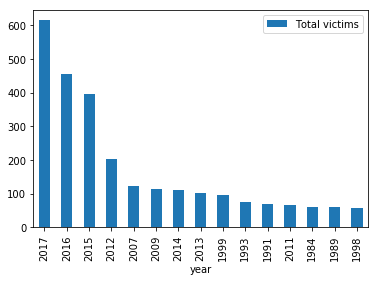

In [53]:
plt.show()

In [54]:
#We see that recently there has been a sudden rise in the mass shootings for all the victims

In [55]:
df1 = pd.DataFrame(file1.groupby('year')['Fatalities'].sum())
df1['year'] = df1.index
df1.head()

,Fatalities,year
year,,
1966,22,1966
1971,2,1971
1972,10,1972
1974,4,1974
1976,8,1976


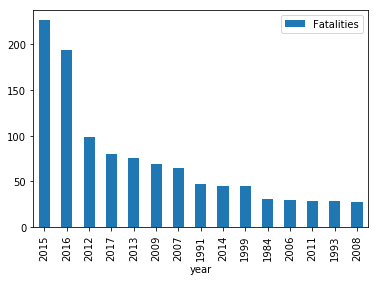

In [56]:
import matplotlib.pyplot as plt
df1.sort_values(by = "Fatalities", ascending =False).head(15).plot(x = 'year', y='Fatalities', kind = 'bar')
plt.show()


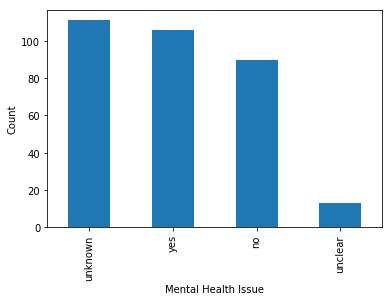

In [57]:
file1['Mental Health Issues'] = file1['Mental Health Issues'].astype(str).str.lower()
file1['Mental Health Issues'].value_counts().plot(kind='bar')
plt.xlabel('Mental Health Issue')
plt.ylabel('Count')
plt.show()

In [58]:
df1=file1['Mental Health Issues'].value_counts()
df1

unknown    111
yes        106
no          90
unclear     13
Name: Mental Health Issues, dtype: int64

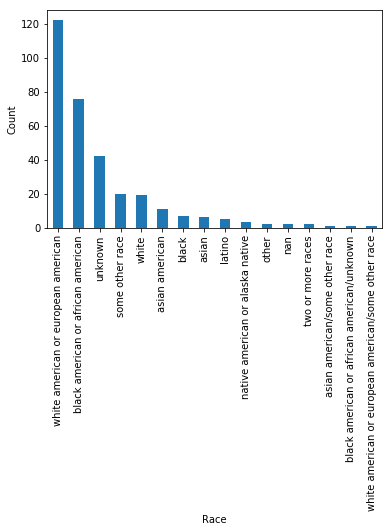

In [59]:
file1['Race'] = file1['Race'].astype(str).str.lower()
file1['Race'].value_counts().plot(kind='bar')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

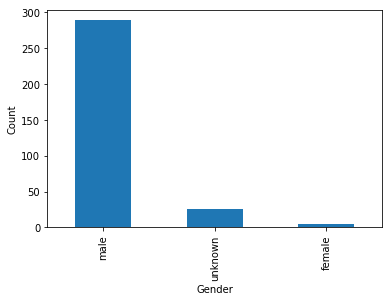

In [62]:
file1['Gender'] = file1['Gender'].astype(str).str.lower()
file1['Gender'].replace(['M','F','m/f','male/female'],['Male','Female','unknown','unknown'] ,inplace=True)
file1['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



In [64]:
df2 = pd.DataFrame(file1.groupby('year')['Injured'].sum())

In [66]:
df2['year'] = df2.index

In [68]:
df2.head()

,Injured,year
year,,
1966,33,1966
1971,4,1971
1972,13,1972
1974,10,1974
1976,9,1976


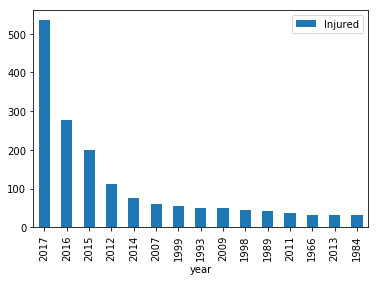

In [69]:
df2.sort_values(by = "Injured", ascending =False).head(15).plot(x = 'year', y='Injured', kind = 'bar')
plt.show()

In [94]:
from ipywidgets import interact 

x
def func(No_of_bins):
    df3 = pd.DataFrame(file1.groupby('year')['Injured'].sum())
    df3['year'] = df2.index
    df3.head()
    df3.sort_values(by = "Injured", ascending =False).head(No_of_bins).plot(x = 'year', y='Injured', kind = 'bar')
    plt.show()
#     x = options
#     return x
interact(func, No_of_bins = [10, 11, 12])

# InjuredVsYear(x)


<function __main__.func>

In [81]:
def InjuredVsYear(t):
    df3 = pd.DataFrame(file1.groupby('year')['Injured'].sum())
    df3['year'] = df2.index
    df3.head()
    df3.sort_values(by = "Injured", ascending =False).head(t).plot(x = 'year', y='Injured', kind = 'bar')
    plt.show()

In [96]:
import plotly.plotly as py
import plotly.graph_objs as go

labels = ['male','unknown','female']
values = [289,26,5]

trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')